  holiday    temp  rain  snow weather        date      Time  traffic_volume
0     NaN  288.28   0.0   0.0  Clouds  02-10-2012  09:00:00            5545
1     NaN  289.36   0.0   0.0  Clouds  02-10-2012  10:00:00            4516
2     NaN  289.58   0.0   0.0  Clouds  02-10-2012  11:00:00            4767
3     NaN  290.13   0.0   0.0  Clouds  02-10-2012  12:00:00            5026
4     NaN  291.14   0.0   0.0  Clouds  02-10-2012  13:00:00            4918
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-

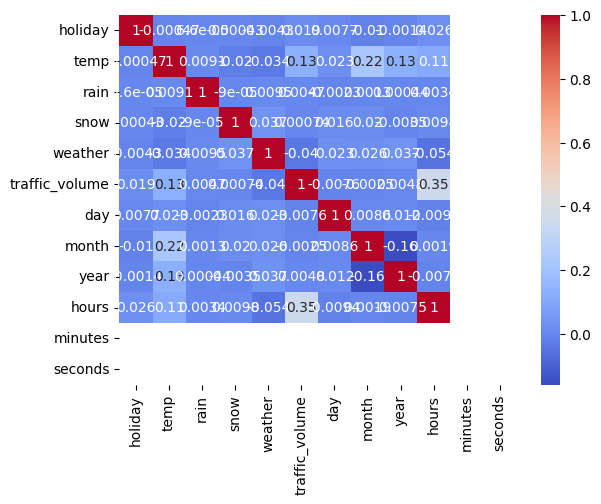

In [1]:
# Importing Libraries
#data preproceesing
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import linear_model, tree, ensemble, svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("traffic volume.csv")

# Show info
print(data.head())
print(data.info())
print(data.describe())

# Fill missing numerical values
for col in ['temp', 'rain', 'snow']:
    data[col] = data[col].fillna(data[col].mean())

# Fill missing categorical values
data['weather'] = data['weather'].fillna('Clouds')
data['holiday'] = data['holiday'].fillna('None')

# Show most common weather values
print(Counter(data['weather']))

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')  # You can also try infer_datetime_format=True if unsure

# Extract date parts
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Split 'Time' into hours, minutes, seconds
data[['hours', 'minutes', 'seconds']] = data['Time'].str.split(':', expand=True).astype(int)

# Drop original 'date' and 'Time' columns
data.drop(columns=['date', 'Time'], inplace=True)

# Encode categorical columns
le_holiday = LabelEncoder()
le_weather = LabelEncoder()

data['holiday'] = le_holiday.fit_transform(data['holiday'])
data['weather'] = le_weather.fit_transform(data['weather'])

# Compute correlation
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Prepare X and y
y = data['traffic_volume']
X = data.drop(['traffic_volume','holiday','weather'],axis=1)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ------------------ Step 1: Imports ------------------#model building
#model building
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import linear_model, tree, ensemble, svm, metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# ------------------ Step 2: Load Data ------------------
data = pd.read_csv("traffic volume.csv")

# ------------------ Step 3: Data Preprocessing ------------------

# Fill missing numeric values
for col in ['temp', 'rain', 'snow']:
    data[col] = data[col].fillna(data[col].mean())

# Fill missing categorical values
data['weather'] = data['weather'].fillna('Clouds')
data['holiday'] = data['holiday'].fillna('None')

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Extract date parts
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Split 'Time' column into hours, minutes, seconds
data[['hours', 'minutes', 'seconds']] = data['Time'].str.split(':', expand=True).astype(int)

# Drop original date and time
data.drop(columns=['date', 'Time'], inplace=True)

# Encode categorical columns
le_holiday = LabelEncoder()
le_weather = LabelEncoder()
data['holiday'] = le_holiday.fit_transform(data['holiday'])
data['weather'] = le_weather.fit_transform(data['weather'])

# Heatmap (optional)
# sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
# plt.show()

# Prepare features and target
y = data['traffic_volume']
X = data.drop(['traffic_volume', 'holiday', 'weather'], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------ Step 4: Model Training & Evaluation ------------------

# Define models
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()

# Train models
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)

# Training predictions
p1_train = lin_reg.predict(x_train)
p2_train = Dtree.predict(x_train)
p3_train = Rand.predict(x_train)
p4_train = svr.predict(x_train)

# Training R²
print("Training R2 Scores:")
print("Linear Regression:", metrics.r2_score(y_train, p1_train))
print("Decision Tree:", metrics.r2_score(y_train, p2_train))
print("Random Forest:", metrics.r2_score(y_train, p3_train))
print("SVR:", metrics.r2_score(y_train, p4_train))



# Testing predictions
p1_test = lin_reg.predict(x_test)
p2_test = Dtree.predict(x_test)
p3_test = Rand.predict(x_test)
p4_test = svr.predict(x_test)

# Test R²
print("\nTest R2 Scores:")
print("Linear Regression:", metrics.r2_score(y_test, p1_test))
print("Decision Tree:", metrics.r2_score(y_test, p2_test))
print("Random Forest:", metrics.r2_score(y_test, p3_test))
print("SVR:", metrics.r2_score(y_test, p4_test))

# RMSE for Random Forest
MSE = metrics.mean_squared_error(y_test, p3_test)
RMSE = np.sqrt(MSE)
print("\nRandom Forest RMSE:", RMSE)

# ------------------ Step 5: Save Models ------------------
pickle.dump(Rand, open("model.pkl", 'wb'))
pickle.dump(le_holiday, open("encoder_holiday.pkl", 'wb'))
pickle.dump(le_weather, open("encoder_weather.pkl", 'wb'))
pickle.dump(scaler, open("scaler.pkl", 'wb'))


Training R2 Scores:
Linear Regression: 0.13193500782637035
Decision Tree: 1.0
Random Forest: 0.978724786492664
SVR: 0.3029325441181543

Test R2 Scores:
Linear Regression: 0.13830090224927227
Decision Tree: 0.7244285410301317
Random Forest: 0.8502304734000498
SVR: 0.3060867240210666

Random Forest RMSE: 769.4906459146332


In [1]:
# Clean Data Preprocessing and Model Training Code

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, tree, ensemble, svm, metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pickle

# ------------------ Step 1: Load Dataset ------------------
data = pd.read_csv("traffic volume.csv")

# ------------------ Step 2: Data Preprocessing ------------------

# Fill missing numeric columns
data.fillna({'temp': data['temp'].mean(),
             'rain': data['rain'].mean(),
             'snow': data['snow'].mean()}, inplace=True)

# Fill missing categorical columns
data['weather'] = data['weather'].fillna('Clouds')
data['holiday'] = data['holiday'].fillna('None')

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Extract date parts
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Split 'Time' into hours, minutes, seconds
data[['hours', 'minutes', 'seconds']] = data['Time'].str.split(':', expand=True).astype(int)

# Drop original 'date' and 'Time'
data.drop(columns=['date', 'Time'], inplace=True)

# Encode categorical columns
le_holiday = LabelEncoder()
le_weather = LabelEncoder()
data['holiday'] = le_holiday.fit_transform(data['holiday'])
data['weather'] = le_weather.fit_transform(data['weather'])

# Save encoders for app use
pickle.dump(le_holiday, open("encoder_holiday.pkl", 'wb'))
pickle.dump(le_weather, open("encoder_weather.pkl", 'wb'))

# ------------------ Step 3: Features and Scaling ------------------
y = data['traffic_volume']
X = data.drop(['traffic_volume'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Save scaler
pickle.dump(scaler, open("scaler.pkl", 'wb'))

# ------------------ Step 4: Train-Test Split ------------------
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------ Step 5: Model Training ------------------
model = ensemble.RandomForestRegressor()
model.fit(x_train, y_train)

# Evaluation
train_r2 = metrics.r2_score(y_train, model.predict(x_train))
test_r2 = metrics.r2_score(y_test, model.predict(x_test))
print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")

# Save model
pickle.dump(model, open("model.pkl", 'wb'))
print("Model and encoders saved successfully.")


Train R2: 0.9780345122859343
Test R2: 0.843194593479071
Model and encoders saved successfully.
